<!--TABLE OF CONTENTS-->
**Table of Contents**:
- [1. Scatterplots](#1.-Scatterplots)
    - [Creating legends](#Creating-legends)
    - [Annotating plots](#Annotating-plots)
    - [Placing figures side-by-side](#Placing-figures-side-by-side)
    - [Altair linked brushing](#Altair-linked-brushing)
- [2. Bubble plots](#2.-Bubble-plots)
- [3. Line graphs](#3.-Line-graphs)
    - [Coloring area under line graph](#Coloring-area-under-line-graph)
- [4. Bar charts](#4.-Bar-charts)
    - [Altair interactive average](#Altair-interactive-average)
- [5. Histograms](#5.-Histograms)
- [6. Heatmaps](#6.-Heatmaps)
- [7. Box plots](#7.-Box-plots)
- [8. Violin plots](#8.-Violin-plots)
- [9. Venn diagrams](#9.-Venn-diagrams)
- [10. Maps](#10.-Maps)

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
from bokeh.plotting import figure, show
from bokeh.io import output_notebook
from bokeh.transform import factor_cmap, factor_mark
import altair as alt
from vega_datasets import data

import pandas as pd
import numpy as np
import geopandas

In [2]:
output_notebook()

Loading BokehJS ...

# 1. Scatterplots

In [3]:
# Load dataset
penguins = sns.load_dataset('penguins')

## Matplotlib scatter plots

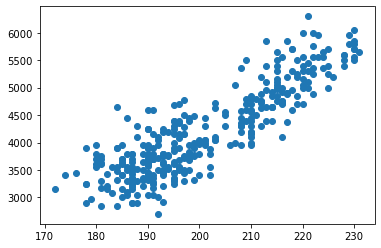

In [4]:
# Matplotlib simple example
plt.scatter(penguins['flipper_length_mm'], penguins['body_mass_g'])
plt.show()

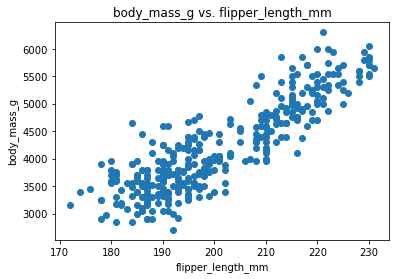

In [5]:
# Matplotlib - Adding labels
plt.scatter(penguins['flipper_length_mm'], penguins['body_mass_g'])
plt.xlabel('flipper_length_mm')
plt.ylabel('body_mass_g')
plt.title('body_mass_g vs. flipper_length_mm')
plt.show()

## Seaborn scatter plots

<AxesSubplot:xlabel='flipper_length_mm', ylabel='body_mass_g'>

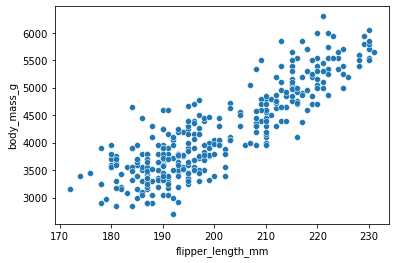

In [6]:
# Seaborn simple example
sns.scatterplot(x=penguins['flipper_length_mm'], y=penguins['body_mass_g'])

Text(0.5, 1.0, 'body_mass_g vs. flipper_length_mm')

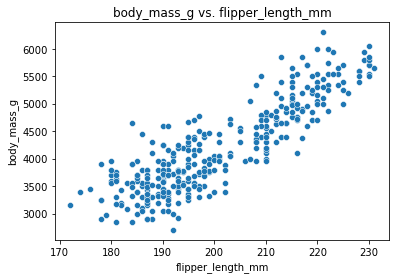

In [7]:
# Seaborn - Adding title
sns.scatterplot(x=penguins['flipper_length_mm'], y=penguins['body_mass_g']).set_title('body_mass_g vs. flipper_length_mm')

## Bokeh scatter plots

In [8]:
# Bokeh simple example
p = figure(plot_width=400, plot_height=300)

#p.scatter(penguins['flipper_length_mm'], penguins['body_mass_g']) # Alternate way to plot scatterplot
p.scatter(x='flipper_length_mm', y='body_mass_g', source=penguins)
show(p)

In [9]:
# Bokeh - adding labels
p = figure(plot_width=400, plot_height=300)

p.scatter(x='flipper_length_mm', y='body_mass_g', source=penguins)
p.title.text = 'body_mass_g vs. flipper_length_mm'
p.xaxis.axis_label = 'flipper_length_mm'
p.yaxis.axis_label = 'body_mass_g'
show(p)

## Altair scatter plots

In [10]:
# Altair simple example
alt.Chart(penguins).mark_point().encode(    
    alt.X('flipper_length_mm'), 
    alt.Y('body_mass_g') 
)

alt.Chart(...)

In [11]:
# Altair - fixing axis limits, adding title, changing figure size, filling in circles, allowing user to pan/zoom
alt.Chart(penguins, title='body_mass_g vs. flipper_length_mm').mark_point(filled=True).encode(
    alt.X('flipper_length_mm', scale=alt.Scale(zero=False)),
    alt.Y('body_mass_g', scale=alt.Scale(zero=False))
).properties(
    width=300,
    height=200
).interactive()

alt.Chart(...)

# 2. Bubble plots

In [12]:
penguins['marker_size'] = (penguins['bill_length_mm']-penguins['bill_length_mm'].min()+1)

## Matplotlib bubble plots

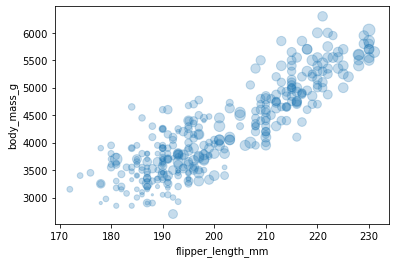

In [13]:
# Matplotlib bubble plot example
plt.scatter(penguins['flipper_length_mm'], penguins['body_mass_g'], 
            s=penguins['marker_size']*5,
            alpha=0.25)
plt.xlabel('flipper_length_mm')
plt.ylabel('body_mass_g')
plt.show()

## Seaborn bubble plots

<AxesSubplot:xlabel='flipper_length_mm', ylabel='body_mass_g'>

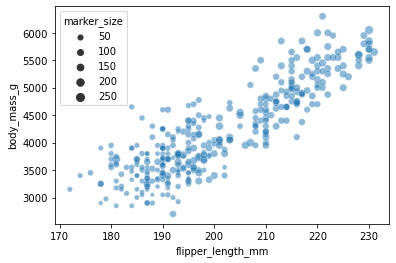

In [14]:
# Seaborn simple example bubble plot
sns.scatterplot(x=penguins['flipper_length_mm'], y=penguins['body_mass_g'],
                alpha=0.5,
                size=penguins['marker_size']*10) # WATCH OUT! Look at the legend.


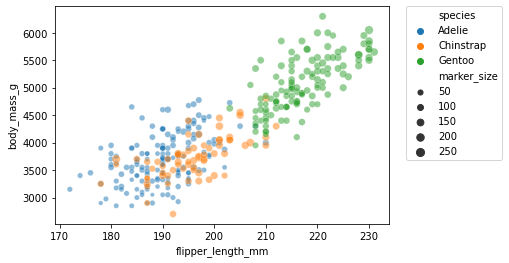

In [15]:
# Seaborn - Add color-coding
sns.scatterplot(x=penguins['flipper_length_mm'], y=penguins['body_mass_g'],
                alpha=0.5,
                size=penguins['marker_size']*10, # WATCH OUT! Look at the legend.
                hue=penguins['species'])
#                hue=penguins['sex'])
#                hue=penguins['island'])
               
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)


## Bokeh bubble plots

In [16]:
# Bokeh simple example

# Create a column to control marker size in the plot
penguins['marker_size'] = (penguins['bill_length_mm']-penguins['bill_length_mm'].min()+1)

p = figure(plot_width=400, plot_height=300)
p.scatter(x='flipper_length_mm', y='body_mass_g', source=penguins,
          size='marker_size', fill_alpha=0.25)

p.title.text = 'body_mass_g vs. flipper_length_mm'
p.xaxis.axis_label = 'flipper_length_mm'
p.yaxis.axis_label = 'body_mass_g'
show(p)

In [17]:
# Prepare for more advanced features in plot
SPECIES = ['Adelie', 'Chinstrap', 'Gentoo']

TOOLTIPS = [
    ("flipper_length_mm", "@flipper_length_mm"),
    ("body_mass_g", "@body_mass_g"),
    ("bill_length_mm", "@bill_length_mm"),
]


In [18]:
# Bokeh - Add color-coding by species, add interactive tooltips
p = figure(plot_width=400, plot_height=300, tooltips=TOOLTIPS)
p.scatter(x='flipper_length_mm', y='body_mass_g', source=penguins,
          size='marker_size', fill_alpha=0.25,
          color=factor_cmap('species', 'Category10_3', SPECIES))

p.title.text = 'body_mass_g vs. flipper_length_mm'
p.xaxis.axis_label = 'flipper_length_mm'
p.yaxis.axis_label = 'body_mass_g'
show(p)

## Altair bubble plots

In [19]:
# Altair simple example
alt.Chart(penguins, title='body_mass_g vs. flipper_length_mm').mark_point(filled=True).encode(  
    alt.X('flipper_length_mm', scale=alt.Scale(zero=False)),
    alt.Y('body_mass_g', scale=alt.Scale(zero=False)),
    alt.OpacityValue(0.5),
    alt.Size('marker_size')
).properties(
    width=300,
    height=200
)

alt.Chart(...)

In [20]:
# Altair - color-code, add tooltips, make interactive
alt.Chart(penguins, title='body_mass_g vs. flipper_length_mm').mark_point(filled=True).encode(  
    alt.X('flipper_length_mm', scale=alt.Scale(zero=False)),
    alt.Y('body_mass_g', scale=alt.Scale(zero=False)),
    alt.OpacityValue(0.5),
    alt.Size('marker_size'),
    alt.Color('species'),
    tooltip = [alt.Tooltip('flipper_length_mm'),
               alt.Tooltip('body_mass_g'),
               alt.Tooltip('bill_length_mm'),
               alt.Tooltip('species')
              ]
).properties(
    width=300,
    height=200
).interactive()

alt.Chart(...)

## Extra Altair coolness - more advanced stuff

In [21]:
# Linked brushing example #1

interval = alt.selection_interval()

chart1 = alt.Chart(penguins).mark_point().encode(    
    alt.X('flipper_length_mm', scale=alt.Scale(zero=False)), 
    alt.Y('body_mass_g', scale=alt.Scale(zero=False)),
    color=alt.condition(interval, 'species', alt.value('lightgray'))
).properties(
    selection=interval
)
    
chart2 = alt.Chart(penguins).mark_point().encode(    
    alt.X('bill_length_mm', scale=alt.Scale(zero=False)), 
    alt.Y('body_mass_g', scale=alt.Scale(zero=False)),
    color='sex'
).transform_filter(
    interval
)

chart1 | chart2


alt.HConcatChart(...)

In [22]:
# Linked brushing example #2

interval = alt.selection_interval()

chart1 = alt.Chart(penguins).mark_point().encode(    
    alt.X('flipper_length_mm', scale=alt.Scale(zero=False)), 
    alt.Y('body_mass_g', scale=alt.Scale(zero=False)),
    color=alt.condition(interval, 'species', alt.value('lightgray'))
).properties(
    selection=interval
)
    
chart2 = alt.Chart(penguins).mark_point().encode(    
    alt.X('bill_length_mm', scale=alt.Scale(zero=False)), 
    alt.Y('body_mass_g', scale=alt.Scale(zero=False)),
    color=alt.condition(interval, 'species', alt.value('lightgray'))
).properties(
    selection=interval
)

chart1 | chart2
#chart1 | chart1.encode(alt.X('bill_length_mm'))

alt.HConcatChart(...)

### Check out https://altair-viz.github.io/user_guide/interactions.html for more cool examples of selections and interactions

# 3. Line graphs

In [23]:
# Load dataset, format dates
flights = sns.load_dataset('flights')
flights['date'] = pd.to_datetime(flights['year'].astype(str) + flights['month'].astype(str), format='%Y%b')
flights.head()

,year,month,passengers,date
0,1949,Jan,112,1949-01-01
1,1949,Feb,118,1949-02-01
2,1949,Mar,132,1949-03-01
3,1949,Apr,129,1949-04-01
4,1949,May,121,1949-05-01


## Matplotlib line graphs

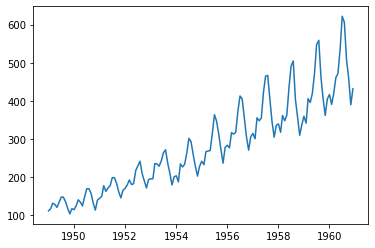

In [24]:
# Matplotlib simple example
plt.plot(flights['date'], flights['passengers'])

## Seaborn line graphs

<AxesSubplot:xlabel='date', ylabel='passengers'>

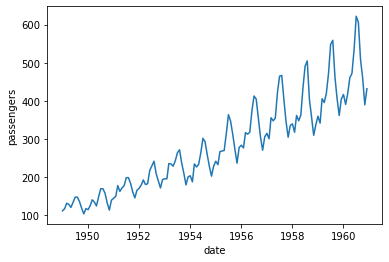

In [25]:
# Seaborn simple example
sns.lineplot(x=flights['date'], y=flights['passengers'])

## Bokeh line graphs

In [26]:
# Bokeh simple example
p = figure(plot_width=400, plot_height=300)#, x_axis_type='datetime')
p.line(x='date', y='passengers', source=flights, line_width=2)
show(p)

## Altair line graphs

In [27]:
# Altair simple example
alt.Chart(flights).mark_line().encode(
    x='date',
    y='passengers'
)

alt.Chart(...)

## Extra Bokeh coolness - more advanced stuff

In [28]:
msft = pd.read_csv('../data/msft.csv')

# This is for demonstration purposes to make the visualization method easier to understand
msft['High'] = msft['High'] * 2 

msft.head()

,Date,Open,High,Low,Close,Volume,OpenInt
0,1986-03-13,0.06720,0.15066,0.06720,0.07533,1371330506,0
1,1986-03-14,0.07533,0.15066,0.07533,0.07533,409569463,0
2,1986-03-17,0.07533,0.15066,0.07533,0.07533,176995245,0
3,1986-03-18,0.07533,0.15066,0.07533,0.07533,90067008,0
4,1986-03-19,0.07533,0.15066,0.07533,0.07533,63655515,0


In [29]:
plot = figure(plot_width=300, plot_height=300, x_axis_type='datetime')
plot.varea(x='index', y1='High', y2='Low', source=msft)
           #fill_color="#99D594")
show(plot)

# 4. Bar charts

In [30]:
# Load dataset
titanic = sns.load_dataset('titanic')
class_count = titanic.groupby('class').count().reset_index()
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


## Matplotlib bar charts

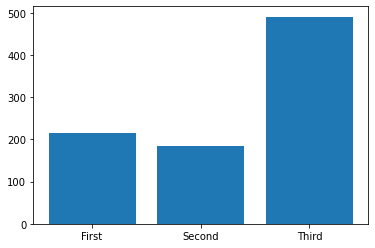

In [31]:
# Matplotlib simple example
plt.bar(class_count['class'], class_count['survived'])
plt.show()

## Seaborn bar charts

<AxesSubplot:xlabel='class', ylabel='survived'>

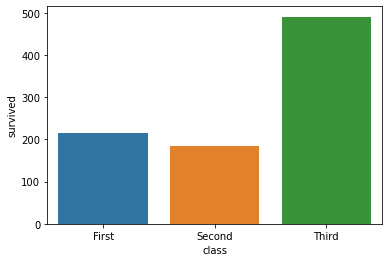

In [32]:
# Seaborn simple example
sns.barplot(x=class_count['class'], y=class_count['survived'])

<AxesSubplot:xlabel='class', ylabel='survived'>

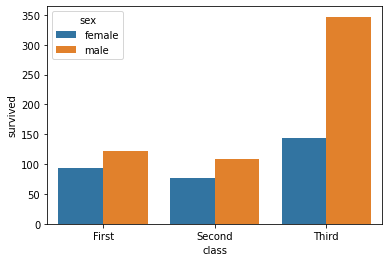

In [33]:
# Seaborn - multiple categories at once
class_sex_count = titanic.groupby(['sex', 'class']).count().reset_index()
sns.barplot(x="class", y="survived", hue="sex", data=class_sex_count)

## Bokeh bar charts

In [34]:
# Bokeh simple example
p = figure(x_range=np.array(class_count['class']), plot_width=400, plot_height=300)
p.vbar(x=np.array(class_count['class']), top=class_count['survived'], width=0.9)
show(p)

## Altair bar charts

In [35]:
# Altair simple example
alt.Chart(class_count).mark_bar().encode(
    x='class',
    y='survived'
)

alt.Chart(...)

# 5. Histograms

# Matplotlib histograms

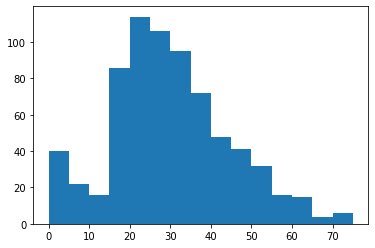

In [36]:
plt.hist(titanic['age'], bins=range(0,80,5))
plt.show()

## Seaborn histograms

<AxesSubplot:xlabel='age', ylabel='Count'>

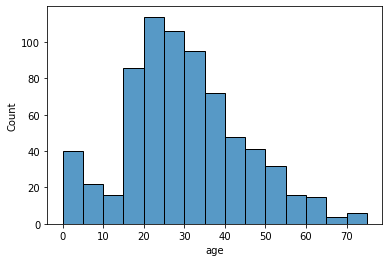

In [37]:
sns.histplot(titanic['age'], bins=range(0,80,5))

## Bokeh histograms

In [38]:
# Bokeh removed histograms in recent versions? Annoying to do heatmaps now!

## Altair histograms

In [39]:
# Altair simple example
alt.Chart(titanic).mark_bar().encode(
    alt.X("age", bin=alt.Bin(step=5)),
    y='count()',
)

alt.Chart(...)

# 6. Box plots

## Seaborn boxplots

<AxesSubplot:xlabel='age'>

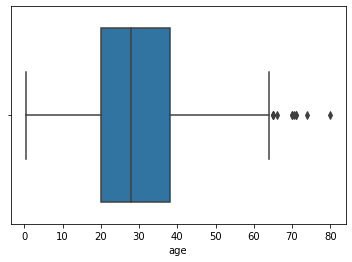

In [40]:
sns.boxplot(x=titanic['age'])

## Altair boxplots

In [41]:
alt.Chart(titanic).mark_boxplot().encode(
    y='age:Q'
)

alt.Chart(...)

# 7. Heatmaps

## Seaborn heatmaps

In [42]:
flights_pivot = flights.pivot("month", "year", "passengers")


<AxesSubplot:xlabel='year', ylabel='month'>

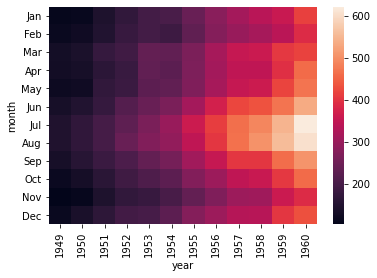

In [43]:
sns.heatmap(flights_pivot)#, annot=True, fmt="d",)

## Bokeh heatmaps

In [44]:
# Bokeh removed heatmaps in recent versions? Annoying to do heatmaps now!

## Altair heatmaps

In [45]:
flights['date'] = pd.to_datetime(flights['year'].astype(str) + flights['month'].astype(str), format='%Y%b')

In [46]:
alt.Chart(flights).mark_rect().encode(
    x=alt.X('date:O', timeUnit='year'),
    y=alt.Y('date:O', timeUnit='month'),
    color='passengers:Q'
)

alt.Chart(...)

# 8. Maps with Altair

In [47]:
state_locs = pd.read_csv('../data/statelatlong.csv')
covid = pd.read_csv('../data/all-states-history.csv')
dtype = {'state': str}
covid_lat_lon = covid.astype(dtype).merge(state_locs.astype(dtype), 'left')
covid_lat_lon.head()

,date,state,dataQualityGrade,death,deathConfirmed,deathIncrease,deathProbable,hospitalized,hospitalizedCumulative,hospitalizedCurrently,...,totalTestsAntigen,totalTestsPeopleAntibody,totalTestsPeopleAntigen,totalTestsPeopleViral,totalTestsPeopleViralIncrease,totalTestsViral,totalTestsViralIncrease,latitude,longitude,state_name
0,11/14/2020,AK,A,98.0,98.0,2,NaN,NaN,NaN,125.0,...,NaN,NaN,NaN,NaN,0,862264.0,17598,61.302501,-158.775020,Alaska
1,11/14/2020,AL,A,3246.0,2998.0,15,248.0,22275.0,22275.0,1120.0,...,NaN,67747.0,NaN,NaN,0,1453155.0,12280,32.601011,-86.680736,Alabama
2,11/14/2020,AR,A+,2148.0,1968.0,0,180.0,7847.0,7847.0,799.0,...,21856.0,NaN,92030.0,NaN,0,1483864.0,0,34.751928,-92.131378,Arkansas
3,11/14/2020,AS,D,0.0,NaN,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0,1768.0,0,NaN,NaN,NaN
4,11/14/2020,AZ,A+,6300.0,5845.0,43,455.0,22937.0,22937.0,1470.0,...,NaN,NaN,NaN,1961414.0,18698,NaN,0,34.168219,-111.930907,Arizona


In [48]:
# Deal with dataframe with more than 5000 rows
#alt.data_transformers.enable('default', max_rows=None)
alt.data_transformers.enable('json')

DataTransformerRegistry.enable('json')

In [49]:

states = alt.topo_feature(data.us_10m.url, feature='states')

# US states background
background = alt.Chart(states).mark_geoshape(
    fill='lightgray',
    stroke='white'
).properties(
    width=500,
    height=300
).project('albersUsa')

# Show the map
background

alt.Chart(...)

In [50]:

def timestamp(t):
  return pd.to_datetime(t).timestamp() * 1000

slider = alt.binding_range(
    step=30 * 24 * 60 * 60 * 1000, # 1 day in milliseconds
    min=timestamp(min(covid_lat_lon['date'])),
    max=timestamp(max(covid_lat_lon['date'])))

select_date = alt.selection_single(
    fields=['date'],
    bind=slider,
    init={'date': 1584835200000},
    name='slider')

deaths = alt.Chart(covid_lat_lon).mark_circle().encode(
    longitude='longitude:Q',
    latitude='latitude:Q',
    size='sum(deathIncrease)',
    tooltip=['state','sum(deathIncrease):Q']
).add_selection(select_date).transform_filter(
    "(year(datum.date) == year(slider.date[0])) && "
    "(month(datum.date) == month(slider.date[0]))"
)

In [51]:
background + deaths

alt.LayerChart(...)